# Seismic Julia Package
The Seismic Package for Julia is under development by SAIG (Signal Analysis and Imaging Group) at the University of Alberta. This module provides tools to read, write, process, and plot 3D reflection seismic data. 

We use this as an example of how to use a large, external Julia package in the syzygy system.

To get started, you first notify Julia that you will be using the two packages PyPlot and Seismic. Enter the following command:

In [1]:
using PyPlot, Seismic

LoadError: LoadError: ArgumentError: module PyPlot not found in current path.
Run `Pkg.add("PyPlot")` to install the PyPlot package.
while loading In[1], in expression starting on line 1

If all goes well, this will load in the required packages.

However, a couple of common problems may arise. 

First, the packages might not be found in the current path. In this case, you need to run `Pkg.add("PyPlot")` to install the PyPlot package. You may alos need to run `Pkg.add("Seismic")` to install the Seismic package.

These commands are entered like this (but don't use them unless you got the error message):

```julia
Pkg.add("PyPlot")
Pkg.add("Seismic")
```
Once you've added the packages, you should again use the command
```julia
using PyPlot, Seismic
```

The second problem you may have is that during the "using" command execution, Julia may have trouble precompiling the modules (you will get an error message). Typically this is due to some incompatability with the "Compat" module. This is a known problem which hopefully will be fixed soon. A work-around is to save your Notebook, close the Jupyter Server, then restart the Server. This seems to load in the compiled packages appropriately.

A third problem you may have is that these are large packages, and the 1 GigaByte of filespace you have been allotted may not be enough for all this. One solution is to get rid of any excess files you no longer need. (Just delete them.) Another solution is to request from your administrator a larger filespace allocation. 

You are now ready to use Seismic Julia.


First, we use the "download command" to grab some data from the United States Geological Survey webserver, as follows:

In [ ]:
download("http://certmapper.cr.usgs.gov/nersl/NPRA/seismic/1979/616_79/PROCESSED/616_79_PR.SGY", "616_79_PR.SGY");


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.3M  100 11.3M    0     0   189k      0  0:01:01  0:01:01 --:--:--  113k


number of traces: 1908
number of samples per trace: 1500


This creates a new file on you server, named "616_79_PR.SGY" which is 11 Megabytes of data. 

Use the "SegyToSeis" command to convert this SEGY-style file into a .seis file (the native file type for the Seismic Julia package). 

In [5]:
SegyToSeis("616_79_PR.SGY", "616_79_PR.seis");

number of traces: 1908
number of samples per trace: 1500


This creates a new file called "616_79_PR.seis" which also is about 11 Megabytes large. 

We next read the file, and extract three data structures:

In [6]:
d, h, e = SeisRead("616_79_PR.seis");

Finally, we plot the data in these data structures using "SeisPlot":

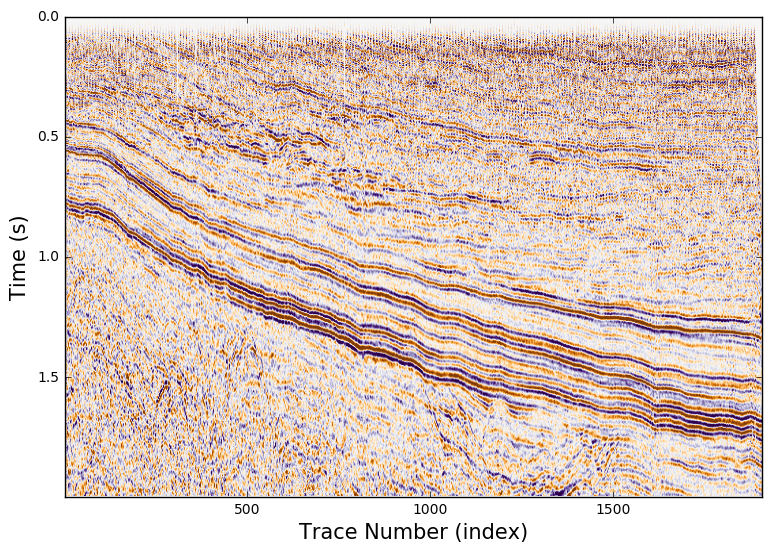

In [7]:
SeisPlot(d[1:500, :], e, cmap="PuOr", wbox=9);

This view is a cross-sectional image of the earth showing some interesting geological layers sloping down to the right. It was constructed from a seismic experiment using vibrational waves to explore the earth's subsurface. 

To learn more about the many utilities available in Seismic Julia, refer to the source pages at: https://github.com/SeismicJulia